<a href="https://colab.research.google.com/github/marcelogarret/rna/blob/main/RNA_aula01_adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np

def criaDataset(n=20, slop=[2, 1], intercept=0):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [-1, 1]
intercept = 1
X, y = criaDataset(slop=slop, intercept=intercept)
X, y

(array([[0.84481098, 0.75904486],
        [0.94503449, 0.26716424],
        [0.05561199, 0.41571384],
        [0.59216236, 0.77460537],
        [0.11738371, 0.94396041],
        [0.22240011, 0.07889379],
        [0.69892942, 0.84902543],
        [0.78714652, 0.81058877],
        [0.43046096, 0.46699057],
        [0.00740773, 0.04179635],
        [0.42161094, 0.22411255],
        [0.27579756, 0.70350497],
        [0.47018634, 0.57595146],
        [0.78453944, 0.64362912],
        [0.27047469, 0.98004592],
        [0.16425676, 0.36837768],
        [0.31304031, 0.52037761],
        [0.42217331, 0.44021235],
        [0.01128435, 0.40101185],
        [0.99665542, 0.79148686]]),
 array([-1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
         1,  1, -1]))

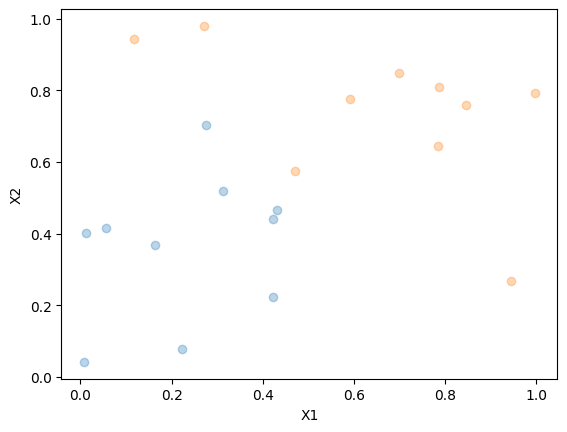

In [58]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotDataset(X, y)

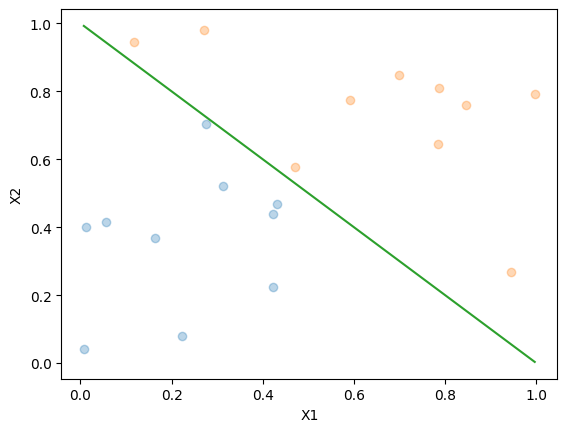

In [59]:
def plotHiperplano(X, y, vetor, intercept):
  x0min = min(X[:,0])
  x0max = max(X[:,0])
  xs = np.linspace(x0min, x0max, num=2)
  ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
  plt.plot(xs, ys)

plotDataset(X, y)
vetor_hiperplano = np.array(slop) * np.array([1, -1])
plotHiperplano(X,y,vetor_hiperplano, intercept)

In [60]:
def sign(a):
  return (a >= 0) * 2 - 1

0.95
[ 1.78385485 -1.62549445 -1.92843757]


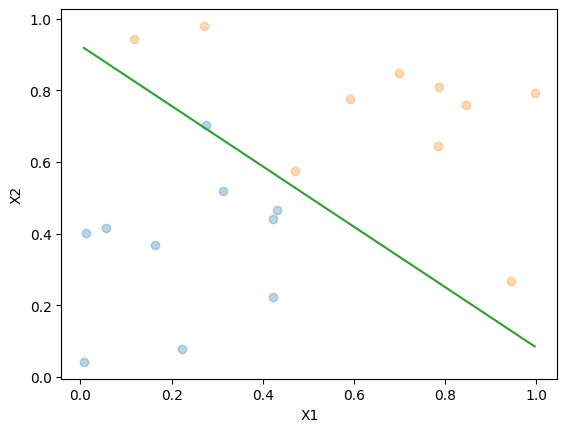

In [61]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100, learning_rate=0.05):
    self.w = None
    self.activation = sign
    self.max_iter = max_iter
    self.learning_rate = learning_rate

  def fit(self, X, Y):
    Xb = include_bias(X)
   # Widrow-Hoff
    # self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    # for _ in range(self.max_iter):
    #   ypred = self.__pre_activation(X)
    #   erros = y - ypred
    #   custo = sum(erros**2)
    #   if custo == 0:
    #     break
    #   self.w += (Xb.T @ erros) * self.learning_rate

  # Pseudoinversa
    self.w = np.linalg.pinv(Xb) @ y

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(accuracy_score(y, ypred))
print(perceptron.w)
plotDataset(X, y)
# plotDataset(X, ypred)
plotHiperplano(X, y, perceptron.w[1:], perceptron.w[0])

0.956
[ 1.78385485 -1.62549445 -1.92843757]


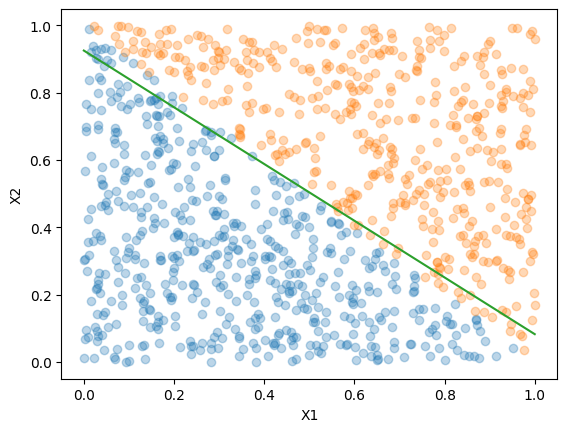

In [62]:
Xte, yte = criaDataset(1000, slop, intercept)
ypred = perceptron.predict(Xte)
print(accuracy_score(yte, ypred))
print(perceptron.w)
plotDataset(Xte, yte)
# plotDataset(X, ypred)
plotHiperplano(Xte, yte, perceptron.w[1:], perceptron.w[0])